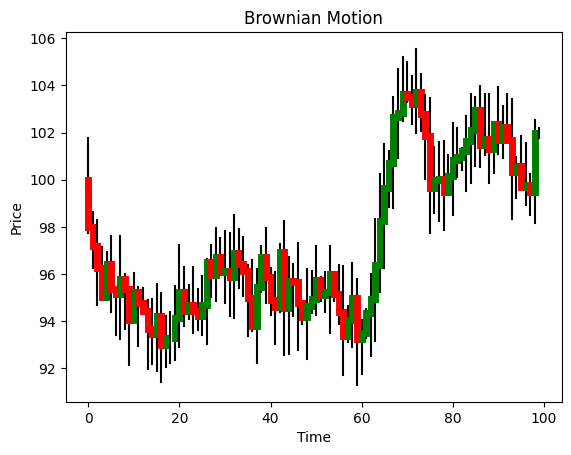

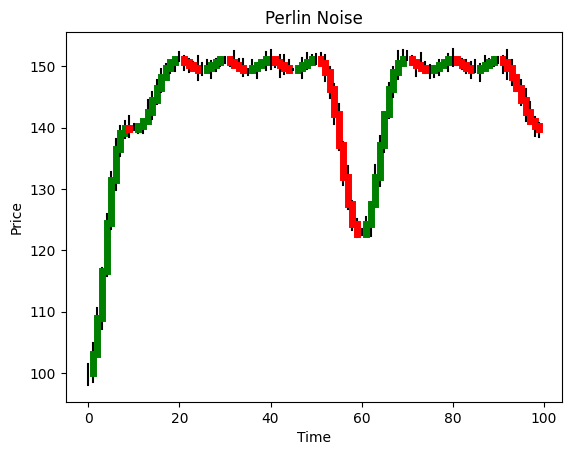

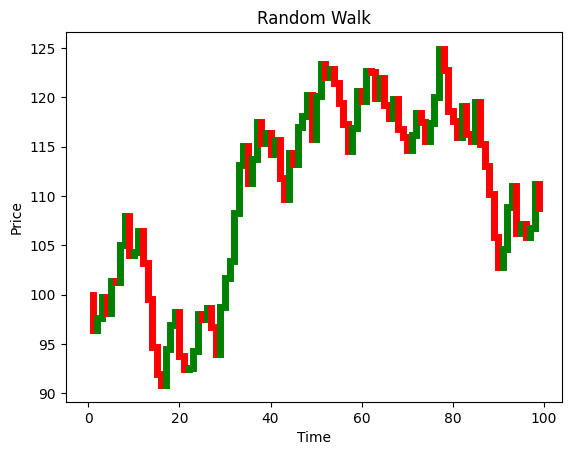

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import noise

def generate_random_candles(n=100):
    data = []
    price = 100
    for _ in range(n):
        open_price = price
        high_price = open_price + np.random.uniform(0, 5)
        low_price = open_price - np.random.uniform(0, 5)
        close_price = low_price + np.random.uniform(0, (high_price - low_price))
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])

def generate_brownian_motion_candles(n=100):
    data = []
    price = 100
    for _ in range(n):
        open_price = price
        change = np.random.normal(loc=0, scale=1)  # Normal distribution
        close_price = open_price + change
        high_price = max(open_price, close_price) + np.random.uniform(0, 2)
        low_price = min(open_price, close_price) - np.random.uniform(0, 2)
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])

def generate_perlin_noise_candles(n=100):
    data = []
    price = 100
    for i in range(n):
        open_price = price
        change = noise.pnoise1(i * 0.1) * 10  # Perlin noise
        close_price = open_price + change
        high_price = max(open_price, close_price) + np.random.uniform(0, 2)
        low_price = min(open_price, close_price) - np.random.uniform(0, 2)
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])

def generate_random_walk_candles(n=100):
    data = []
    price = 100
    for _ in range(n):
        open_price = price
        change = np.random.choice([-1, 1]) * np.random.uniform(0, 5)
        close_price = open_price + change
        high_price = max(open_price, close_price)
        low_price = min(open_price, close_price)
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])

def plot_candles(df, title='Candlestick Chart'):
    fig, ax = plt.subplots()
    for idx, row in df.iterrows():
        color = 'green' if row['Close'] >= row['Open'] else 'red'
        ax.plot([idx, idx], [row['Low'], row['High']], color='black')
        ax.plot([idx, idx], [row['Open'], row['Close']], color=color, linewidth=5)
    ax.set_title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

# Generate and plot data
try:
    brownian_df = generate_brownian_motion_candles(100)
    perlin_df = generate_perlin_noise_candles(100)
    random_walk_df = generate_random_walk_candles(100)
    plot_candles(brownian_df, title='Brownian Motion')
    plot_candles(perlin_df, title='Perlin Noise')
    plot_candles(random_walk_df, title='Random Walk')
except ValueError as e:
    print(f"Error: {e}")